## The Excellent Store Challenge by Data Science Nigeria

To remind us about data cleaning:
### Data Cleaning 
Data cleaning refers to the process of detecting, correcting, replacing, modifying or removing messy aspects from a dataset.


Getting straight to business😊, let's take a tour round the dataset we will be working on

### About the Excellent store dataset
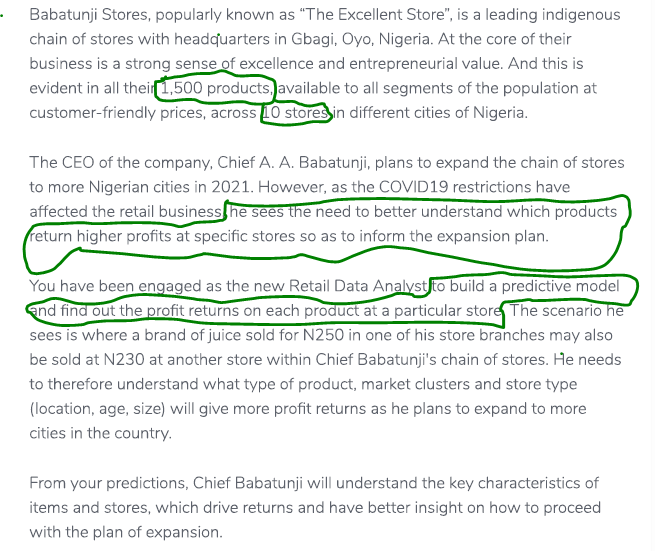
###### the highlighted parts are the most important parts of the data given 

Our aims are as follows:
1. Have a thorough look into the data
2. Understand the columns we are dealing with
3. Fix the issues any column may have

Import the modules (call our friends 😉) we will need to achieve these aims

In [1]:
import pandas as pd#the data is in tabular form this module relates well with tables
import numpy as np#works with arrays tables are made up of arrays
import seaborn as sns#for plotting
import matplotlib.pyplot as plt#for plotting also
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### The jupyter notebook you create to work on the excellent store dataset must be in the location of the data for easy access

##### Note that whatever cleaing you do for the train you must do for the test too

Let's meet the columns of the dataset and their datatype (are they numbers ore characters) we will be needing our friend pandas and he is only one call away👌👌

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          2871 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           2573 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 331.2+ KB


So we see under the datatype there are three possible types: objects,float and integer. Objects refers to string elements and float refers to decimal numbers. So it means for each element in the Item_ID column is a string, each element in Item_Weight is a float and each element in Store_Start_Year is an integer. We can still try this out 

In [6]:
type(train['Item_ID'].iloc[0]) #iloc[n] function chooses the nth observation under the column e.g iloc[0] gives the first observation

str

You can try this out for other columns

Now let's view the statistical information about the train and the test

In [7]:
train.describe(include='all')

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
count,4990,4990,4990,4188.000000,4990,4990.000000,4990,4990.000000,4990.000000,3540,4990,4990,4990.000000
unique,1451,10,4990,NaN,3,NaN,16,NaN,NaN,3,3,4,NaN
top,NCL31,BABATUNJI049,NCU30_BABATUNJI046,NaN,Low Sugar,NaN,Snack Foods,NaN,NaN,Medium,Cluster 3,Supermarket Type1,NaN
freq,9,620,1,NaN,3039,NaN,758,NaN,NaN,1582,1940,3304,NaN
mean,NaN,NaN,NaN,12.908838,NaN,0.066916,NaN,391.803796,2004.783567,NaN,NaN,NaN,6103.520164
std,NaN,NaN,NaN,4.703256,NaN,0.053058,NaN,119.378259,8.283151,NaN,NaN,NaN,4447.333835
min,NaN,NaN,NaN,4.555000,NaN,0.000000,NaN,78.730000,1992.000000,NaN,NaN,NaN,83.230000
25%,NaN,NaN,NaN,8.767500,NaN,0.027273,NaN,307.890000,1994.000000,NaN,NaN,NaN,2757.660000
50%,NaN,NaN,NaN,12.600000,NaN,0.053564,NaN,393.860000,2006.000000,NaN,NaN,NaN,5374.675000
75%,NaN,NaN,NaN,17.100000,NaN,0.095358,NaN,465.067500,2011.000000,NaN,NaN,NaN,8522.240000


In [9]:
test.describe(include='all')

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
count,3532,3532,3532,2871.000000,3532,3532.000000,3532,3532.000000,3532.000000,2573,3532,3532
unique,1207,10,3532,NaN,3,NaN,16,NaN,NaN,3,3,4
top,FDX04,BABATUNJI027,FDX40_BABATUNJI019,NaN,Low Sugar,NaN,Fruits and Vegetables,NaN,NaN,Medium,Cluster 3,Supermarket Type1
freq,8,473,1,NaN,2161,NaN,485,NaN,NaN,1211,1409,2273
mean,NaN,NaN,NaN,12.781665,NaN,0.065030,NaN,296.903392,2004.900057,NaN,NaN,NaN
std,NaN,NaN,NaN,4.554868,NaN,0.049454,NaN,181.897221,8.497250,NaN,NaN,NaN
min,NaN,NaN,NaN,4.555000,NaN,0.000000,NaN,78.230000,1992.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,8.840000,NaN,0.026811,NaN,145.307500,1994.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,12.600000,NaN,0.054444,NaN,237.770000,2006.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,16.600000,NaN,0.094049,NaN,461.002500,2011.000000,NaN,NaN,NaN


You will see that the Item_ID, Store_ID, Item_Store_ID,	Item_Sugar_Content,	Item_Type,	Store_Size,	Store_Location_Type, Store_Type have 'NaN' from mean to max. This is because their datatype is object. You can't find the mean of a set of letters for example.

In [10]:
train.isnull().sum() #isnull isa function that tells the number of missen values in a column.

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [11]:
test.isnull().sum()

Item_ID                  0
Store_ID                 0
Item_Store_ID            0
Item_Weight            661
Item_Sugar_Content       0
Item_Visibility          0
Item_Type                0
Item_Price               0
Store_Start_Year         0
Store_Size             959
Store_Location_Type      0
Store_Type               0
dtype: int64

Back to the data info given, we were told there were 10 stores and 1500 products. Let's check that out. The Store_ID gives the 10 different stores (Check where we did train.describe you will see the unique items to be 10). For the 1500 products, well i guess the data given to us only contained information about 1451 of them. On the same line we did train.describe check the unique items under item_Id column. 
Also on row 'top' still under train.describe line, this gives us the mode of each column.
let us replace the null values in the column Store_Size with the mode. And let us replace the null values in the column Item_weight with the mean.

In [13]:
#Let us the check the unique store_id with the function unique
train['Store_ID'].unique()

array(['BABATUNJI010', 'BABATUNJI013', 'BABATUNJI017', 'BABATUNJI018',
       'BABATUNJI035', 'BABATUNJI045', 'BABATUNJI019', 'BABATUNJI027',
       'BABATUNJI049', 'BABATUNJI046'], dtype=object)

In [14]:
test['Store_ID'].unique()

array(['BABATUNJI010', 'BABATUNJI013', 'BABATUNJI017', 'BABATUNJI027',
       'BABATUNJI035', 'BABATUNJI046', 'BABATUNJI049', 'BABATUNJI018',
       'BABATUNJI045', 'BABATUNJI019'], dtype=object)

In [34]:
train['Store_Size'].fillna('Medium',inplace =True) #fillna fills null values with the value you want
test['Store_Size'].fillna('Medium',inplace =True)

In [35]:
train['Item_Weight'].fillna(12.908838,inplace =True)
test['Item_Weight'].fillna(12.781665,inplace =True)

we are done filling missen values. Now let's handle categorical columns
Categorical values are also known as discrete or qualitative values. Categorical values can be further categorized as mainly nominal and ordinal. 
- Nominal values are values that have two or more categories, but which do not have an intrinsic order that is, you cannot place one group above the order.
- Just like nominal values, ordinal values have two or more categories. However, unlike nominal values, ordinal values can be ordered or ranked (i.e., they have levels).

Numerical values are values expressed in numbers, rather than natural language description. Sometimes called quantitative values,numerical values are always collected in number form. 

We will see that the Item_Sugar_Content and Store_Size are ordinal categorical feature.
 We can best handle it by LabelEncoding or OneHot Encoder 

We use LabelEncoding for Ordinal variables and OneHotencoder for nominal variables. The essence of the two is to convert categorical columns into numerical columns

we will use LabelEncoder for store_size, Item_sugar_content and OneHotEncoder for Item_Type, Store_Location_Type, Store_Type

In [37]:
from sklearn.preprocessing import LabelEncoder

In [39]:
lbl = LabelEncoder()
train['Store_Size']=lbl.fit_transform(train['Store_Size'])
train['Item_Sugar_Content']=lbl.fit_transform(train['Item_Sugar_Content'])

In [44]:
left = pd.get_dummies(train[['Item_Type', 'Store_Location_Type', 'Store_Type']])
train = train.join(left)

In [46]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,0,0.068535,Soft Drinks,357.54,2005,1,...,0,1,0,0,0,1,1,0,0,0
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,0,0.040912,Soft Drinks,355.79,1994,0,...,0,1,0,0,0,1,0,1,0,0
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,0,0.041178,Soft Drinks,350.79,2014,1,...,0,1,0,0,1,0,0,1,0,0
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,0,0.041113,Soft Drinks,355.04,2016,1,...,0,1,0,0,0,1,0,0,1,0
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,2,0.000000,Soft Drinks,354.79,2011,2,...,0,1,0,0,1,0,0,1,0,0


Since we have use onehot encoder (pd.getdummies) forItem_Type, Store_Location_Type, Store_Type we need to drop the columns

In [48]:
to_drop=['Item_Type', 'Store_Location_Type', 'Store_Type']
train.drop(to_drop,inplace =True,axis =1) #the drop function drops the columns specified

we an also change the store_start_year to the store_start_age

In [49]:
train['Store_Start_age']= 2020-train['Store_Start_Year']
train.drop('Store_Start_Year',axis=1,inplace =True)

In [50]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Price,Store_Size,Item_Store_Returns,Item_Type_Baking Goods,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3,Store_Start_age
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,0,0.068535,357.54,1,709.08,0,...,1,0,0,0,1,1,0,0,0,15
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,0,0.040912,355.79,0,6381.69,0,...,1,0,0,0,1,0,1,0,0,26
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,0,0.041178,350.79,1,6381.69,0,...,1,0,0,1,0,0,1,0,0,6
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,0,0.041113,355.04,1,2127.23,0,...,1,0,0,0,1,0,0,1,0,4
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,2,0.000000,354.79,2,2481.77,0,...,1,0,0,1,0,0,1,0,0,9
